In [1]:
import string
import json
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axis import Axis 

In [2]:
cd /Users/akshay/Python Files/Fetch rewards assignment

/Users/akshay/Python files/Fetch Rewards assignment


In [3]:
text = open("text_data.txt","r")

In [4]:
d = dict()
output = []
result = []

In [5]:
# Loop through each line of the file 
for line in text: 
    # Remove the leading spaces and newline character 
    line = line.strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
    
    output.append(line)
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
    
    # Split the line into words 
    words = line.split(" ")

    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
# Print the contents of dictionary 
for key in list(d.keys()): 
    print(key, ":", d[key])
 

“letter : 1
1 : 1
to : 35
mrs : 1
saville : 1
england : 1
scrapers : 1
st : 2
petersburgh : 3
dec : 1
11th : 1
17— : 1
you : 11
will : 5
rejoice : 1
hear : 1
that : 12
no : 3
disaster : 1
has : 3
accompanied : 2
the : 68
commencement : 1
of : 36
an : 6
enterprise : 2
which : 19
have : 8
regarded : 1
with : 12
such : 2
evil : 1
forebodings : 1
i : 46
arrived : 1
here : 1
yesterday : 1
and : 44
my : 42
first : 2
task : 1
is : 9
assure : 1
dear : 4
sister : 3
welfare : 1
increasing : 1
confidence : 1
in : 24
success : 1
undertaking : 3
am : 4
already : 2
far : 2
north : 3
london : 1
as : 9
walk : 1
streets : 1
feel : 2
a : 26
cold : 3
northern : 1
breeze : 2
play : 1
upon : 1
cheeks : 1
braces : 1
nerves : 1
fills : 1
me : 9
delight : 2
do : 3
understand : 1
this : 9
feeling : 1
travelled : 1
from : 4
regions : 1
towards : 1
advancing : 1
gives : 1
foretaste : 1
those : 6
icy : 1
climes : 1
inspirited : 1
by : 7
wind : 1
promise : 1
daydreams : 1
become : 1
more : 2
fervent : 1
vivid : 1


In [6]:
#Save the word count dictionary file locally
with open('word_count_dict.json', 'w') as fp:
    json.dump(d, fp, sort_keys=True, indent=4)

In [7]:
#Join and display the text which still contains the hidden sentences
s="".join(output)
s

"“letter 1to mrs. saville, england. <scrapers<st. petersburgh, dec. 11th, 17—.you will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. i arrived here yesterday, and my first task is to assure my $you$ dear sister of my welfare and increasing confidence in the success of my undertaking.i am already far north of london, and as i walk in the streets of petersburgh, i feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. do you understand this feeling? this breeze, which has travelled from the regions towards which i am advancing, gives me a foretaste of those icy climes. inspirited by this wind of promise, my daydreams become more fervent and vivid. i try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents $are$ itself to my imagination as the region of beauty and delight. there, margaret, the sun is for ever visible, i

In [8]:
#Find all the instances of first hidden sentence
match1=re.findall(r'\$\S*\$',s)
#Remove all the instances of the first hidden sentence from the text
s=re.sub(r'\$\S*\$', '', s)
#Store the hidden sentence in a list 
result.append(match1)

In [9]:
match2=re.findall(r'\<\S*\<',s)
s=re.sub(r'\<\S*\<', '', s)
result.append(match2)

In [10]:
match3=re.findall(r'\#\S*\#',s)
s=re.sub(r'\#\S*\#', '', s)
result.append(match3)

In [11]:
match4=re.findall(r'\*\S*\*',s)
s=re.sub(r'\*\S*\*', '', s)
result.append(match4)

In [12]:
result

[['$you$', '$are$', '$amazing!$'],
 ['<scrapers<', '<for<', '<the<', '<win!<'],
 ['#found#', '#another#', '#one!#'],
 ["*you're*", '*killin*', '*it!*']]

In [13]:
for list in result:
    for i in list:
        #join the iterable of the list to form a string
        a=" ".join(list)
        #Remove the bookend symbols from the strings
        a=re.sub(r'\$|\<|\#|\*', '', a)
    print(a)

you are amazing!
scrapers for the win!
found another one!
you're killin it!


In [14]:
#Save the clean text locally
text_file = open("Clean_Frankenstein.txt", "w")
text_file.write(s)
text_file.close()

<BarContainer object of 575 artists>

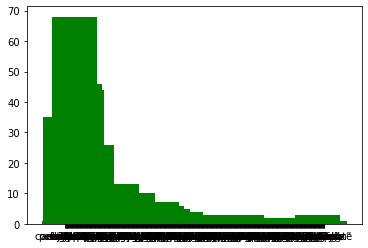

In [31]:
plt.bar(d.keys(), d.values(),width=100, color='g')